# TP2

## Imports et stopwords

In [110]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
from collections import defaultdict
import sys
import spacy
nlp = spacy.load('fr_core_news_md')
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer un fichier contenant le texte de tous les bulletins de l'année 1865

In [111]:
# Choisir une année
year = 1865

In [112]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1865_Tome_I1_Part_1.txt',
 'Bxl_1865_Tome_I1_Part_2.txt',
 'Bxl_1865_Tome_I1_Part_3.txt',
 'Bxl_1865_Tome_I1_Part_4.txt',
 'Bxl_1865_Tome_II1_Part_1.txt',
 'Bxl_1865_Tome_II1_Part_2.txt',
 'Bxl_1865_Tome_II1_Part_3.txt',
 'Bxl_1865_Tome_II1_Part_4.txt',
 'Bxl_1865_Tome_II1_Part_5.txt',
 'Bxl_1865_Tome_II1_Part_6.txt',
 'Bxl_1865_Tome_II1_Part_7.txt']

In [113]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [114]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [115]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["abord", "agit", "ailleurs", "ainsi", "année", "années", "ans", "août", "après", "art", "article", "assez", 
       "aucune", "aujourd", "aussi", "autre", "autres", "avant", "avenue", "avis", "avoir", "avril", "bas", 
       "beaucoup", "bien", "bon", "boulevard", "bourgmestre", "bruxelles", "but", "car", "carrés", "cas", "cause", "cela", 
       "celle", "celui", "cent", "centimes", "cependant", "celte", "centiares", "cet", "cette", "ceux", "chaque","chacun", "charge", 
       "charger", "chez", "chose", "collège", "comme", "communal", 
       "communale", "commune", "communes", "compris", "conclusion", "conclusions", "conditions", "conformément", "conseil", 
       "conséquence", "contre", "côté", "courant", "cours", "crois", "décembre", "décembre.", "déjà", "demander", "depuis", 
       "dernier", "dès", "dernière", "deux", "devant", "devoir", "dire", "dit", "divers", "diverses", "dix", "doit", "doivent", 
       "donc", "dont", "echevin", "echevins", "échevin", "effet", "elles", "encore", "ensemble", "entre", "établir", "etc", "être", "faire", 
       "fait", "faite", "faites", "faut", "favorable", "février", "fois", "francs", "général", "grand", "grande", "habitants", 
       "haut", "het", "heure", "heures", "honneur", "honorable", "hui", "huit", "idem", "ils", "informe", "jamais", "janvier", "jean", 
       "jour", "jours", "juillet", "juin", "jusqu", "juste", "kil", "laquelle", "les", "lettre", "leurs", "lieu", "lorsque", "lorsqu", "mai", "manière", 
       "mars", "membre", "membres", "messieurs", "mètres", "mille", "millions", "moins", "mois", "nécessaire", "nécessaires", 
       "neuf", "nom", "nombre", "nombreux", "non", "nouveau", "nouvelle", "nouvelles", "novembre", "objet", "observations", "obtenir", 
       "octobre", "ordre", "parce", "part", "partie", "pendant", "personnes", "petit", "peu", "peut", "peuvent", "pièces", "place", "plus", "plusieurs", 
       "point", "possible", "pourra", "pourrait", "premier", "première", "prendre", "principe", "propose", "proposer", "public", 
       "publics", "publique", "publiques", "puis", "quand", "quant", "quartier", "quatre", "quelques", "quelque", "question", "raison", "rapport", 
       "rapports", "reste", "résulte", "rien", "rue", "sans", "savoir", "seance", "séance", "seconde", "section", "septembre", "seulement", "sieur", "situés",
       "six", "sorte", "soumis", "sous", "suite", "suivant", "système", "temps", "total", "tous", "tout", "toute", "toutes", 
       "très", "trois", "troisième", "trop", "trouve", "van", "vient", "ville", "voie", "voir", "voyez", "vue", "présente", "accord", "afin", "partir", 
       "vingt", "date", "également", "aucun", "fera", "cinq", "surtout", "donne", "mettre", "matin", "suivants", "vers"]
sw = set(sw)


### Créer la fonction de nettoyage

In [116]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [117]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1865_clean.txt!'

In [118]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'bulletin semestre imprimerie bols wittouck bulletin samedi numéro comité nommé grade instituteur écoles communaleles sieurs coenderaet michel bondt égide aelen baptiste nommé jules guillery avocat délivré florent joseph certificat bonne conduite exigé code instruction criminelle produit appui demande réhabilitation prix pain publie ofliciers police pain ménage vend pyck marché porcs pyck laeken vancalster minimes dépôt teinturiers vandervoorst chats dépôt anderlecht herpels granvelle degrave min'

In [119]:
frequencies = Counter(after.split())
print(frequencies.most_common(20))

[('travaux', 775), ('projet', 576), ('administration', 525), ('droit', 343), ('demande', 342), ('taxe', 324), ('prix', 322), ('somme', 315), ('finances', 314), ('plan', 282), ('hospices', 281), ('proposition', 278), ('approbation', 277), ('loi', 277), ('hôtel', 276), ('senne', 274), ('impôt', 271), ('dépenses', 254), ('watteeu', 253), ('saint', 249), ('terrain', 247), ('société', 246), ('exécution', 238), ('cour', 237), ('montagne', 234), ('construction', 232), ('eau', 231), ('discussion', 230), ('rues', 226), ('dépense', 226), ('assainissement', 225), ('concession', 225), ('eaux', 224), ('commission', 222), ('compte', 222), ('anspach', 221), ('frais', 219), ('valeur', 213), ('police', 207), ('orts', 201), ('enfants', 189), ('gouvernement', 186), ('parc', 177), ('permanente', 173), ('midi', 171), ('donner', 170), ('secours', 170), ('subside', 169), ('vente', 167), ('autorisation', 166), ('vote', 163), ('budget', 161), ('maison', 159), ('payer', 159), ('propriétés', 156), ('travail', 15

## Nuage de mots pour l'année 1865

### Créer, stocker et afficher le nuage de mots

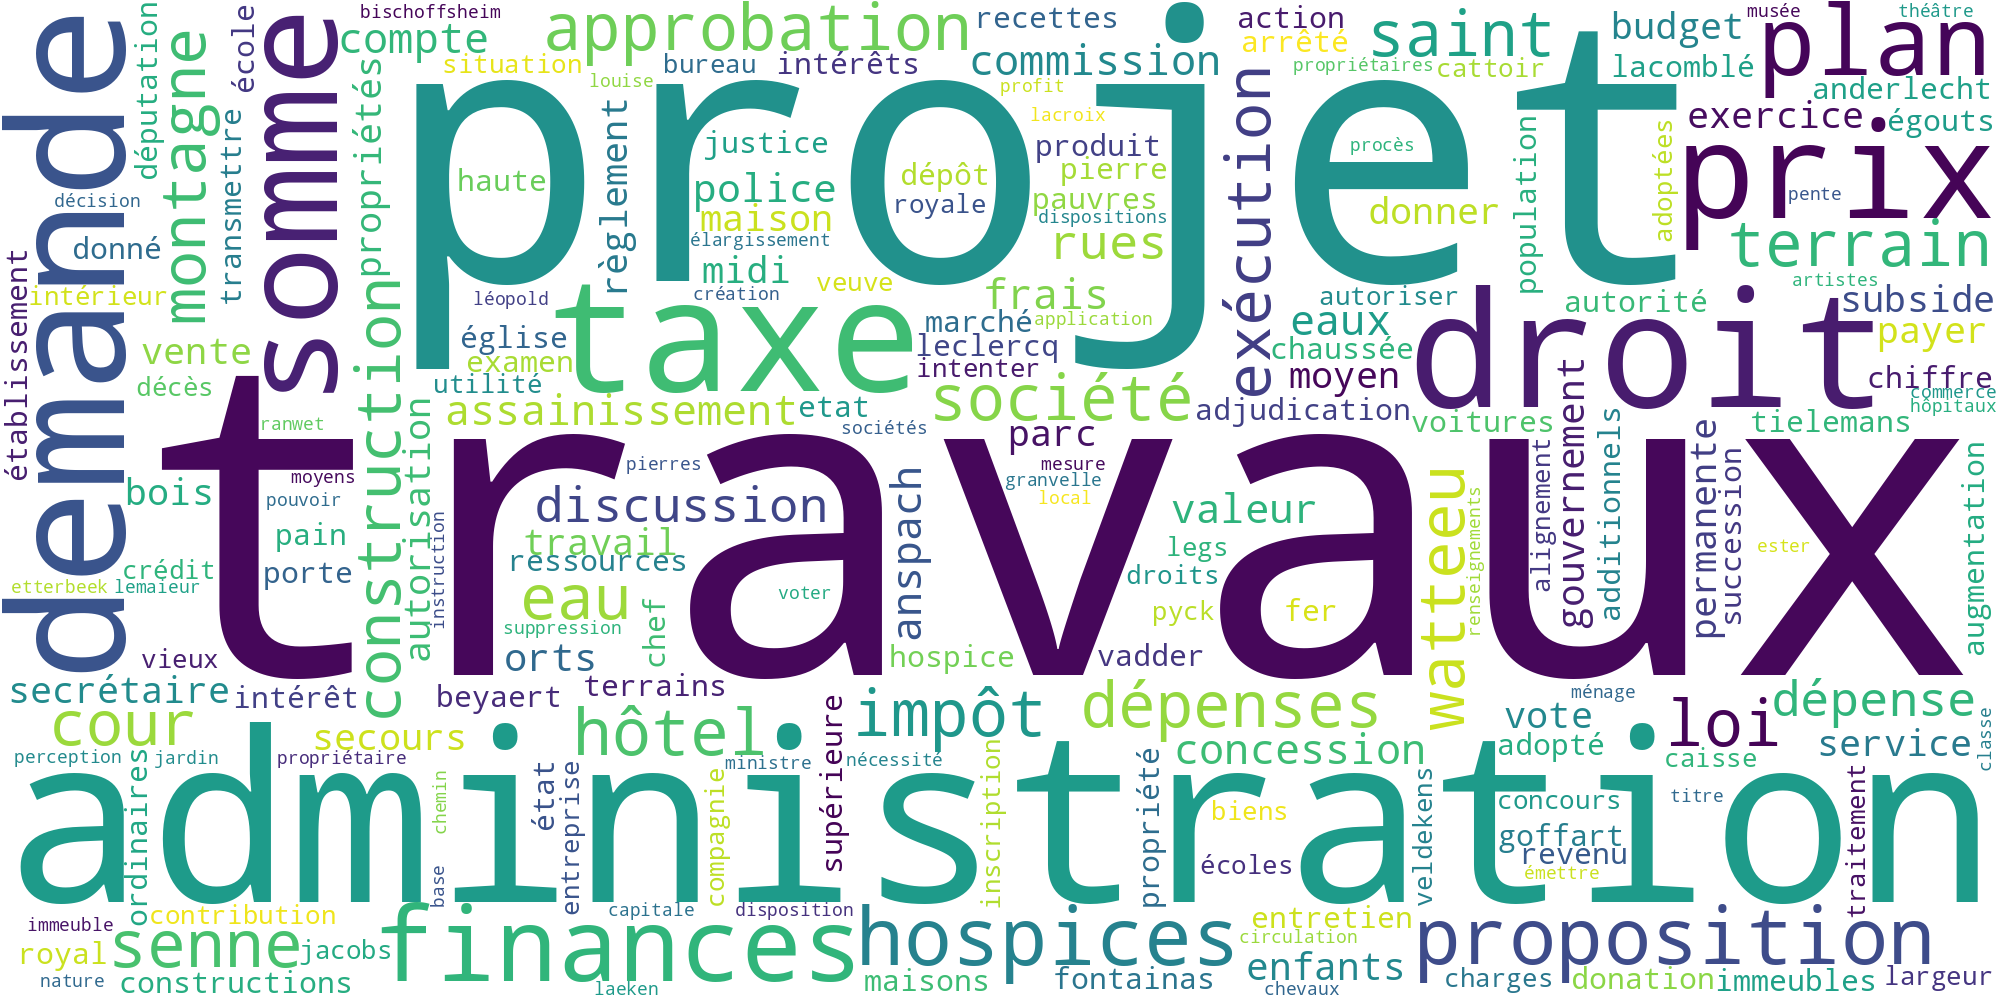

In [120]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy appliquée aux bulletins de l'année 1865

In [15]:
# Charger le texte
n=900000
text = open(os.path.join(temp_path, f'{year}_clean.txt'), encoding='utf-8').read()[:n]

In [20]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 2.2 s, sys: 0 ns, total: 2.2 s
Wall time: 2.19 s


In [18]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [19]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

beyaert apparait 21 fois dans le corpus
goffart apparait 13 fois dans le corpus
fontainas apparait 8 fois dans le corpus
watteeu apparait 8 fois dans le corpus
lacomblé anspach apparait 7 fois dans le corpus
madeleine apparait 5 fois dans le corpus
vadder goffart apparait 4 fois dans le corpus
lacomblé apparait 4 fois dans le corpus
walter apparait 4 fois dans le corpus
anspach lacomblé apparait 3 fois dans le corpus
victor guiot apparait 3 fois dans le corpus
anspach watteeu vandermeeren apparait 3 fois dans le corpus
godefroy apparait 3 fois dans le corpus
joseph apparait 2 fois dans le corpus
vanlaethem remp apparait 2 fois dans le corpus
hochsteyn lemaieur waedemon leclercq fontainas godefroy apparait 2 fois dans le corpus
michel gudule apparait 2 fois dans le corpus
mersman apparait 2 fois dans le corpus
sablon apparait 2 fois dans le corpus
capouillet apparait 2 fois dans le corpus
guimard apparait 2 fois dans le corpus
belle laide apparait 2 fois dans le corpus
trou saint roch a

# Sentiment analysis avec Textblob-FR

In [29]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

## Analyser le sentiment de 10 phrases reprises aléatoirement dans les bulletins de l'année 1865

In [30]:
get_sentiment("Loin de moi la pensée de m'associer à n'importe quelle exagération et de substituer le flamand au français ; mais je crois qu'il est de l'intérêt de l'administration et d'une bonne politique de ne pas méconnaître les devoirs que la position de capitale impose à Bruxelles, et de maintenir les deux langues sur un pied d'égalité là où cela est possible.")

This text is 22% positive and 0.24% subjective.


In [121]:
get_sentiment("L'expertise aura lieu de sept à huit heures du matin ; passé cette dernière heure, les viandes n'y seront plus admises.")

This text is 11% negative and 0.18333333333333335% subjective.


In [32]:
get_sentiment("Par testament olographe, en date du 8 mai 1855, déposé chez M . le notaire Peeters, à Puers, la dame Marie-Livine De Middeleer,veuve Papon, a légué à la fabrique de l'église SS. Michel et Gudule, une somme de 4,000 francs, à charge par celle-ci de faire dire annuellement cent messes basses pour le repos de son âme et de celle de son mari.")

This text is neutral and 0.1% subjective.


In [33]:
get_sentiment("La rue Montagne de la Cour serait laissée dans son état actuel, et on conserverait le disgracieux pâté de maisons qui existe entre cette artère et la rue des Trois-Têtes.")

This text is 12% negative and perfectly objective.


In [34]:
get_sentiment("Si, d'un côté, nous avons eu à déplorer souvent le délabrement et l'excessive malpropreté des logements, dus la plupart du temps à l'incurie des locataires, d'un autre côté, nous avons été souvent frappés d'admiration à la vue d'habitations où les conditions hygiéniques sont observées avec une minutie qu'on rencontre rarement dans des classes plus élevées de la société.")

This text is 6% negative and 0.36% subjective.


In [35]:
get_sentiment("Les mutations dans le personnel subalterne sont plus nombreuses : parmi les agents nouvellement nommés, plusieurs n'ont pas répondu à notre attente ; d'autres n'ont pu s'accoutumer aux fatigues et aux exigences de leur nouvelle position.")

This text is 3% negative and 0.172% subjective.


In [36]:
get_sentiment("Mais il faut convenir que ces exceptions se multiplient tellement qu'elles finissent par devenir la règle.")

This text is neutral and 0.6% subjective.


In [37]:
get_sentiment("Ce n'a été, on ne peut trop le répéter, que grâce à leur désintéressement et à leur dévouement sans bornes, joints aux avantages tout particuliers que présente la capitale pour le haut enseignement, que l'Université de notre ville est parvenue au degré de prospérité où nous la voyons arrivée aujourd'hui.")

This text is 5% positive and 0.18333333333333332% subjective.


In [38]:
get_sentiment("Comme vient de vous le dire l'honorable membre, le magnifique élan de charité qui s'est produit à l'occasion de la catastrophe de Dour, a eu pour effet de réduire, dans de notables' proportions, les sommes que les particuliers ont l'habitude d'ajouter aux fonds mis par le Conseil à la disposition du Bourgmestre, dans l'intérêt d'une certaine catégorie des pauvres de la capitale.")

This text is 14% positive and 0.3500000000000001% subjective.


In [39]:
get_sentiment("Nous avons choisi, pour garder nos squares, d'anciens sapeurs-pompiers en retraite.")

This text is 7% positive and 0.2% subjective.
